# Natural Language Processing First Assignment
#### This is the notebook for the first assignment about the dataset **"Polite Guard"**. The objective of this work is to come up with a pipeline that builds a robust and good model for text classification

## **Importing the dataset**
##### The first step is to import the dataset we are using, the original dataset already split test and training data, as well as validation data

In [1]:
import pandas as pd;

traning_file = "data/train/train_cot.csv";
test_file = "data/test/test_cot.csv";
validation_file = "data/validation/validation_cot.csv";


traning_set = pd.read_csv(traning_file);
test_set = pd.read_csv(test_file);
validation_set = pd.read_csv(validation_file);

print(traning_set.head());
print(test_set.head());
print(validation_set.head());


                                                text            label  \
0  Your flight has been rescheduled for 10:00 AM ...          neutral   
1  We're happy to accommodate your dietary prefer...           polite   
2  Our vegetarian options are available on the me...          neutral   
3  I understand your frustration with the recent ...  somewhat polite   
4  I'll do my best to find a suitable replacement...  somewhat polite   

                                  source  \
0  meta-llama/Meta-Llama-3.1-8B-Instruct   
1  meta-llama/Meta-Llama-3.1-8B-Instruct   
2  meta-llama/Meta-Llama-3.1-8B-Instruct   
3  meta-llama/Meta-Llama-3.1-8B-Instruct   
4  meta-llama/Meta-Llama-3.1-8B-Instruct   

                                           reasoning  
0  This text would be classified as "neutral" bec...  
1  This text is polite because it expresses grati...  
2  This text would be classified as "neutral" bec...  
3  This text would be classified as "somewhat pol...  
4  This text would be

## **Extracting text corpus**
##### We have to extract the text from the documents in te dataset so we can use different representations to operate on.
##### Note that this is an unclean version of the corpus

In [2]:
unclean_corpus = []
for i in range(0, len(traning_set["text"])):
    unclean_corpus.append(traning_set['text'][i]);
print(unclean_corpus[0:5]);

["Your flight has been rescheduled for 10:00 AM tomorrow. Please check the airport's website for any updates or changes.", "We're happy to accommodate your dietary preferences. Our vegetarian options are carefully crafted to ensure a delicious and satisfying meal. Would you like me to recommend some dishes that fit your needs?", 'Our vegetarian options are available on the menu, and our chef can modify any dish to suit your dietary needs.', "I understand your frustration with the recent tournament results, and I'll review the standings to see what we can do to improve your experience.", "I'll do my best to find a suitable replacement for the item you're looking for, but I need to know more about what you're looking for."]


## **Cleaning the text corpus**
##### Now we need to process the unclean text corpus, by performing actions such as:
- ##### Removing punctuation;
- ##### Lower case folding;
- ##### Stemming (using PorterStemmer);
- ##### Removing Stop Words (optional);
##### For that effect we will import [regular expression](https://docs.python.org/3/library/re.html) library and [nltk](https://www.nltk.org/api/nltk.html)

In [3]:
import re;

from nltk.corpus import stopwords;
from nltk.stem.porter import PorterStemmer;

ps = PorterStemmer();
sw = stopwords.words('english');
clean_corpus = []
for i in range(0,len(unclean_corpus)):
    text = re.sub('[^a-zA-Z]', ' ', unclean_corpus[i]);
    text = text.lower();

    text = [ps.stem(word) for word in text.split() if not word in sw];
    text = ' '.join(text);
    clean_corpus.append(text);
print(clean_corpus[0:5]);

['flight reschedul tomorrow pleas check airport websit updat chang', 'happi accommod dietari prefer vegetarian option care craft ensur delici satisfi meal would like recommend dish fit need', 'vegetarian option avail menu chef modifi dish suit dietari need', 'understand frustrat recent tournament result review stand see improv experi', 'best find suitabl replac item look need know look']


## **Representing the corpus in different models**
##### Now that we have cleaned documents from our dataset, it's time to represent them in different textual representations so we can use them to train our model.

### First representation model is **Bag of Words**

In [4]:
from sklearn.feature_extraction.text import CountVectorizer;
import numpy as np;

# print all the array content
np.set_printoptions(threshold=np.inf)

cv = CountVectorizer();

BoW = cv.fit_transform(clean_corpus).toarray();
print("Cleaned text", BoW.shape);

#print(cv.get_feature_names_out());

#print(BoW[0]);

Cleaned text (40000, 3770)


##### We compared the representation of the unclean and clean version of the corpus as well
##### As we can see, the cleaned text reduced the feature size (column number, y of the pair "(x,y)" of shape) by a significant amount because we reduced the words to their stem, standardized the capitalization and removed unecessary tokens like punctuation.

In [5]:

Bow_unclean = cv.fit_transform(unclean_corpus).toarray();
print("Unclean text",Bow_unclean.shape);
print("Cleaned text", BoW.shape);


Unclean text (40000, 6116)
Cleaned text (40000, 3770)


#### We can also plot a **wordcloud** using the representation (although it only uses the text corpus to count and not the vectorizer) respectively for:
- #### Unclean text;
- #### Clean text;

Word Cloud for unclean corpus


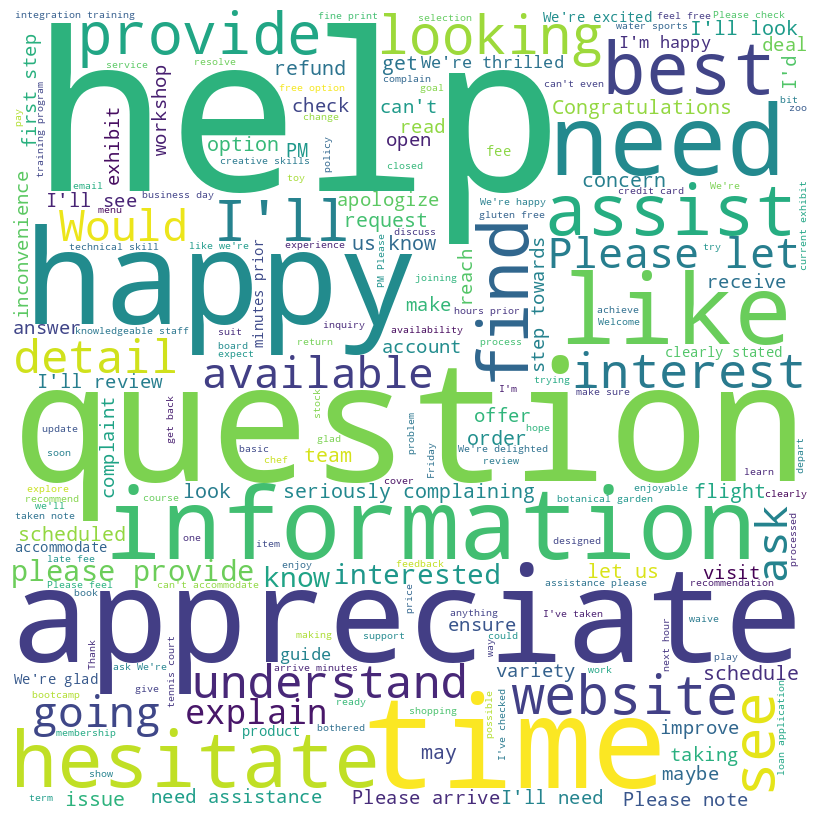

Word Cloud for clean corpus


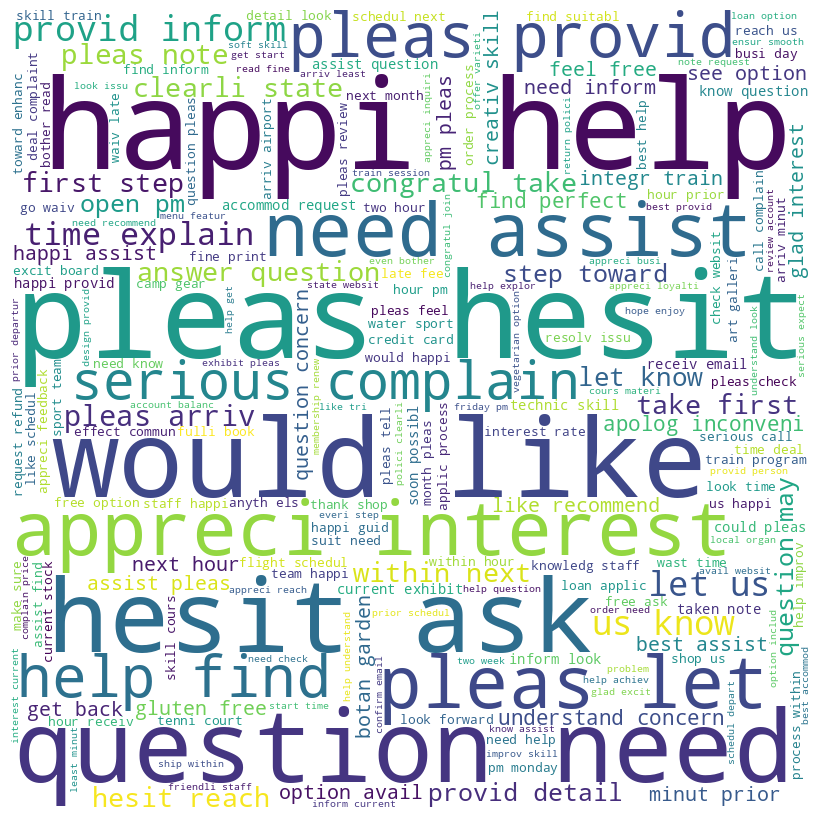

In [6]:
import wordcloud;
import matplotlib.pyplot as plt;

wordcloud_unclean = wordcloud.WordCloud(width = 800, height = 800, background_color = 'white', stopwords = sw, min_font_size = 10).generate(" ".join(unclean_corpus));
plt.figure(figsize = (8, 8), facecolor = None);
plt.imshow(wordcloud_unclean);
plt.axis("off");
plt.tight_layout(pad = 0);
print("Word Cloud for unclean corpus");
plt.show();

wordcloud_clean = wordcloud.WordCloud(width = 800, height = 800, background_color = 'white', stopwords = sw, min_font_size = 10).generate(" ".join(clean_corpus));
plt.figure(figsize = (8, 8), facecolor = None);
plt.imshow(wordcloud_clean);
plt.axis("off");
plt.tight_layout(pad = 0);
print("Word Cloud for clean corpus");
plt.show();


#### One noticeable difference is that some of the most common words like "help", "question" or "appreciate" were reduced to ashes, mainly because its discriminative power is low accross different documents (texts), they repeat a lot in many documents in different forms in other words, so standardizing them helped reducing their numbers, therefore increasing its discriminative power.

### Second representation is **TF-IDF**
##### This is a measure that takes into account the discriminative power of the words from the vocabylary considering all the documents(our texts), by assigning a weight to each of the terms of the vocabulary.
##### **TF** stands for Term Frequency and is the total frequency that a word appears considering all the documents;
##### **DF** stands for Document Frequency and it measures the number of documents that have a certain word. The higher the more frequent is a word accross all the documents (bad thing -> low discriminative power);
##### **IDF** stands for Inverse Document Frequency and the inverse of the DF. Higher means rarer the word is accross all the documents (good thing -> high discriminative power).
##### **TF-IDF** is a measure that is the product of **TF** and **IDF**:
- ##### Highest when t occurs many times within a small number of documents;
- ##### Lower when the term occurs fewer times in a document, or occurs in many documents;
- ##### Lowest when the term occurs in virtually all documents.

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer;

TfIdf_vectorizer = TfidfVectorizer();
Tf_idf_unclean = TfIdf_vectorizer.fit_transform(unclean_corpus).toarray();
print("TfIdf unclean",Tf_idf_unclean.shape)
Tf_Idf = TfIdf_vectorizer.fit_transform(clean_corpus).toarray();
print("TfIdf clean", Tf_Idf.shape);
#print(Tf_Idf[0]);

TfIdf unclean (40000, 6116)
TfIdf clean (40000, 3770)


#### We can plot a word cloud to see the distribution of the words for the clean and unclean corpus according to their weight and importance, with Tf-Idf representation:

Word Cloud for clean corpus


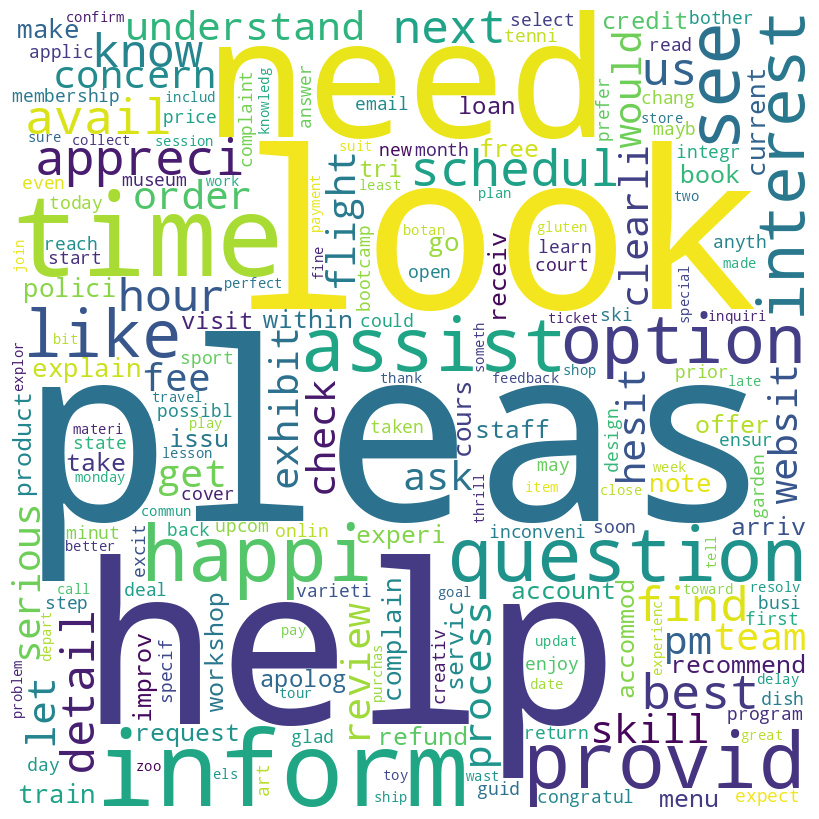

TypeError: Image data of dtype object cannot be converted to float

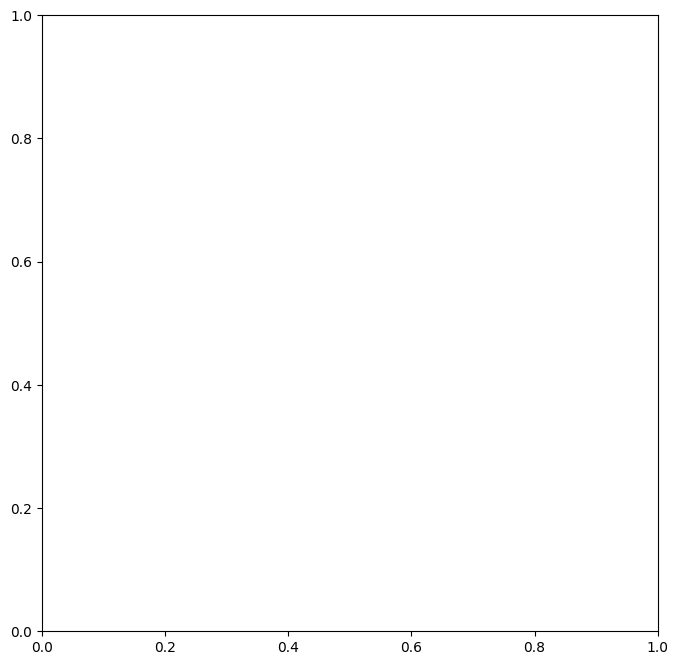

In [ ]:

features = TfIdf_vectorizer.get_feature_names_out();
# dictionary to sum the weights of each unique word for the clean corpus
word_count = dict()
for i in range(0,len(clean_corpus)):
    for feature in range(0,len(features)):
        word_count[features[feature]] = word_count.get(features[feature],0) + Tf_Idf[i][feature]

wordcloud_tfidf_clean = wordcloud.WordCloud(width = 800, height = 800, background_color = 'white', min_font_size = 10).generate_from_frequencies(word_count);
plt.figure(figsize = (8, 8), facecolor = None);
plt.imshow(wordcloud_tfidf_clean);
plt.axis("off");
plt.tight_layout(pad = 0);
print("Word Cloud for clean corpus");
plt.show();

#dict for unclean wordcount
word_count_unclean = dict()
for i in range(0,len(unclean_corpus)):
    for feature in range(0,len(features)):
        word_count_unclean[features[feature]] = word_count_unclean.get(features[feature],0) + Tf_idf_unclean[i][feature];


wordcloud_tfidf_unclean = wordcloud.WordCloud(width = 800, height = 800, background_color = 'white', min_font_size = 10).generate_from_frequencies(word_count_unclean);
plt.imshow(word_count_unclean);
plt.axis("off");
plt.tight_layout(pad = 0);
print("Word Cloud for unclean corpus");
plt.show();
    